In [2]:
import numpy as np
import pandas as pd

In [14]:
# reading the text file
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t',
                   header=None, names=['label', 'body_text'])

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [20]:
# getting length oh each column in the dataframe
length = data['body_text'].str.len()

In [24]:
# inserting into the dataframe
data.insert(2, "length", length, True)

In [25]:
data.head()

,label,body_text,length,Age,Age
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,196,196,196
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,155,155
2,ham,"Nah I don't think he goes to usf, he lives around here though",61,61,61
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,77,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,35,35


In [26]:
# deleting a column
del data['Age']

In [27]:
data.head()

,label,body_text,length
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
2,ham,"Nah I don't think he goes to usf, he lives around here though",61
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


In [56]:
# getting the punctuation list!
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data['punct'] = data.body_text.apply(lambda s: count(s, string.punctuation))

In [59]:
data.head()

,label,body_text,length,punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,196,4
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,6
2,ham,"Nah I don't think he goes to usf, he lives around here though",61,2
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,2


In [60]:
# check for null value
data.isnull().sum()

label        0
body_text    0
length       0
punct        0
dtype: int64

In [61]:
len(data)

5568

In [65]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [66]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

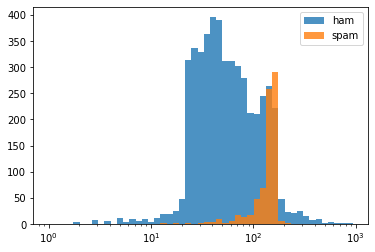

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(data[data['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(data[data['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

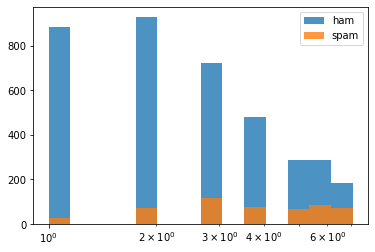

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 15))
plt.hist(data[data['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(data[data['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [70]:
# ML
from sklearn.model_selection import train_test_split

In [73]:
# X feature date
X = data[['length', 'punct']]

# y label
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [74]:
X_train.shape

(3730, 2)

In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
# create model
mod = LogisticRegression()

In [78]:
# train model
mod.fit(X_train, y_train)

LogisticRegression()

In [79]:
# Test accuracy of the model
from sklearn import metrics

In [81]:
predictions = mod.predict(X_test)

In [82]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [84]:
print(metrics.confusion_matrix(y_test, predictions))

[[1568   40]
 [ 228    2]]


In [85]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions),
                  index=['ham', 'spam'], columns=['ham', 'spam'])

In [86]:
df

,ham,spam
ham,1568,40
spam,228,2


In [88]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1608
        spam       0.05      0.01      0.01       230

    accuracy                           0.85      1838
   macro avg       0.46      0.49      0.47      1838
weighted avg       0.77      0.85      0.81      1838



In [89]:
print(metrics.accuracy_score(y_test, predictions))

0.8541893362350381


In [92]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [93]:
ndpredictions = nb.predict(X_test)

In [94]:
print(metrics.confusion_matrix(y_test, ndpredictions))

[[1604    4]
 [ 227    3]]


In [95]:
print(metrics.classification_report(y_test, ndpredictions))

              precision    recall  f1-score   support

         ham       0.88      1.00      0.93      1608
        spam       0.43      0.01      0.03       230

    accuracy                           0.87      1838
   macro avg       0.65      0.51      0.48      1838
weighted avg       0.82      0.87      0.82      1838



In [96]:
print(metrics.accuracy_score(y_test, ndpredictions))

0.8743199129488575
